# PRE READING

### In An Introduction to Statistical Learning External link, 2nd edition, read the following sections:

### Section 5.1.1 Validation Set Approach

# Exercise: Model Selection

In [1]:
# Import necessary libraries
import operator
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Load the data from the csv file
df = pd.read_csv("dataset.csv")

# Take a quick look at the data
df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [3]:
# Use the values of column x as the predictor variable
x = df[['x']].values

# Use the values of column y as the response variable
y = df['y'].values


In [4]:
x

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81]])

In [5]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6])

In [6]:
### edTest(test_split) ###

# Split the data into train and test splits
# Set aside 25% for testing with a random state of 1
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1)


In [7]:
# Create an empty list to store test MSEs
test_error = []


In [8]:
### edTest(test_linear_mse) ###

# Initialize a simple Linear Regression model
model = LinearRegression()

# Fit the model on the train data
model.fit(x_train,y_train)

# Predict using the trained model on the test data
y_pred = model.predict(x_test)

# Compute the MSE of the test predictions
mse = mean_squared_error(y_test,y_pred)

# Append the error to the list initialized above
test_error.append(mse)


In [9]:
### edTest(test_poly_mse) ###
# Initialize a list of degree values to create polynomial features
degree_list = [2,5]

# Run a for loop through the degrees of the polynomial
for d in degree_list:
    
    # Compute the polynomial features for the train data, for the current degree
    X_train = PolynomialFeatures(degree=d).fit_transform(x_train)
    
    # Compute the polynomial features for the test data, for the current degree
    X_test = PolynomialFeatures(degree=d).fit_transform(x_test)
    
    # Initialize a linear regression model
    lreg = LinearRegression()
    
    # Fit the linear model on the transformed train data
    lreg.fit(X_train, y_train)
    
    # Predict using the trained model on the test data
    y_pred = lreg.predict(X_test)
    
    # Compute the MSE of the test predictions
    mse = mean_squared_error(y_test,y_pred)

    # Append the error to the list initialized above
    test_error.append(mse)


In [10]:
### edTest(test_knn_mse) ###

# Initialize a list of k values to specify the number of neighbors
knn_list = [1,20]

# Loop through the k values from the list defined above
for i in knn_list:
    
    # Initialize a kNN model with the current k value
    model = KNeighborsRegressor(n_neighbors=int(i))
    
    # Fit the model on the train data
    model.fit(x_train,y_train)
    
    # Predict using the trained model on the test data
    y_pred = model.predict(x_test)
    
    # Compute the MSE of the test predictions
    mse = mean_squared_error(y_test,y_pred)

    # Append the error to the list initialized above
    test_error.append(mse)
    

In [11]:
# Helper code to visualize the MSE of the 5 models 
pt = PrettyTable()
pt.field_names = ["Model","MSE"]
pt.add_row(["Linear Regression", round(test_error[0],2)])
pt.add_row(["Polynomial Model with Degree 2", round(test_error[1],2)])
pt.add_row(["Polynomial Model with Degree 5", round(test_error[2],2)])
pt.add_row(["KNN Model with k=1", round(test_error[3],2)])
pt.add_row(["KNN Model with k=20", round(test_error[4],2)])
print(pt)


+--------------------------------+-------+
|             Model              |  MSE  |
+--------------------------------+-------+
|       Linear Regression        | 13.58 |
| Polynomial Model with Degree 2 |  5.01 |
| Polynomial Model with Degree 5 | 92.27 |
|       KNN Model with k=1       | 70.56 |
|      KNN Model with k=20       | 47.26 |
+--------------------------------+-------+


# Exercise: Model Selection using validation

In [12]:
# Import necessary libraries
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [13]:
# Read the file "dataset.csv" as a Pandas dataframe
df = pd.read_csv("dataset.csv")

# Take a quick look at the dataset
df.head()


,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [14]:
# Assign the values of the x and y column values to the 
# predictor and response variables
x = df[['x']].values
y = df.y.values


In [15]:
### edTest(test_random) ###

# Split the dataset into train and validation sets with 75% training set
# Set random_state=1
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=1)


In [16]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(1, maxdeg+1):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    # Initialize a linear regression model, 
    # Note: Sklearn's PolynomialFeatures adds a bias column by default.
    # Set fit_intercept = False when initializing the linear regression
    # model to avoid having 2 intercepts.
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train,y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val,y_val_pred))
    

In [17]:
training_error

[21.555301976313565,
 16.383592227945687,
 12.300371842351161,
 12.291515611533196,
 11.114581634180563,
 9.678267770224398,
 9.25406672555098,
 8.971395619680793,
 8.5467039056627,
 8.234624042703452]

In [18]:
validation_error

[13.581688275061781,
 5.011790297235175,
 21.685716252147536,
 20.47099643914223,
 92.27168006477974,
 229.11041018694686,
 655.0320123570054,
 1748.1553055308543,
 4195.806117593716,
 8197.222984833521]

In [19]:
### edTest(test_best_degree) ###

# Helper code to compute the best degree, which is the model 
# with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)+1

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)


The best degree of the model is 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


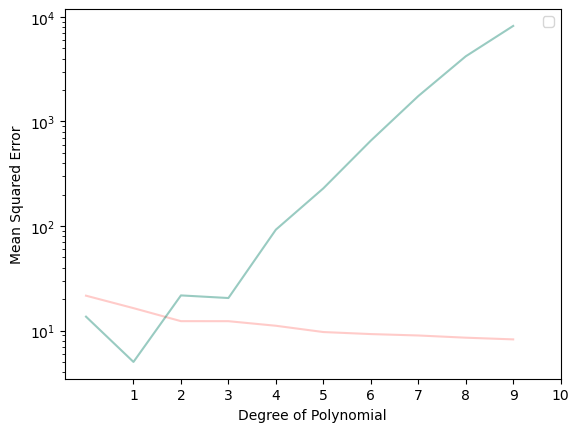

In [21]:
# Plot the errors as a function of increasing d value to visualise the training 
# and testing errors
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(range(maxdeg),training_error, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax.plot(range(maxdeg),validation_error, color='#007D66', alpha=0.4)

# Set the plot labels and legends
ax.set_xlabel('Degree of Polynomial')
ax.set_xticks(range(1, maxdeg+1))
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show();


# Exercise: Model Selection using Cross-validation

In [150]:
# Import necessary libraries
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [151]:
# Read the file "dataset.csv" as a Pandas dataframe 
df = pd.read_csv("dataset.csv")


In [152]:
# Assign the values of column x as the predictor
x = df[['x']].values

# Assign the values of column y as the response variable
y = df.y.values


In [153]:
### edTest(test_random) ###
# Split the data into train and validation sets with 75% for training 
# and with a random_state=1
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=1)


In [160]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 20

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, validation_error, cross_validation_error = [],[],[]

# Loop through the degrees of the polynomial
for d in range(0,maxdeg):
    
    # Compute the polynomial features for the entire data
    x_poly = PolynomialFeatures(degree=d).fit_transform(x)

    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(degree=d).fit_transform(x_val)

    # Initialize a Linear Regression object (set fit_intercept to False since PolynomialFeatures adds an intercept by default)
    lreg = LinearRegression(fit_intercept=False)
  
    # Fit model on the training set
    lreg.fit(x_poly_train,y_train)

    # Predict on the training data
    y_train_pred = lreg.predict(x_poly_train)

    # Predict on the validation set
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the mse on the train data
    training_error.append(mean_squared_error(y_train,y_train_pred))

    # Compute the mse on the validation data
    validation_error.append(mean_squared_error(y_val,y_val_pred))
    
    # Perform cross-validation on the entire data with 10 folds and 
    # get the mse_scores
    mse_score = cross_validate(lreg,x_poly,y,scoring="neg_mean_squared_error",cv=10,return_train_score=True)
    
    # Compute the mean of the cross validation error and store in list 
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function 
    cross_validation_error.append(abs(mse_score['test_score'].mean()))
    

In [161]:
cross_validation_error

[43.355491194444426,
 29.460389901133293,
 17.21896089024453,
 58.40062795623313,
 172.6405845410768,
 3212.496629985473,
 13680.466929158498,
 180.40610409281237,
 90386.61403605083,
 99989.19181863114,
 798304.0191346064,
 27517109.893644743,
 118870221610.0032,
 1586133234423.3354,
 12410861727395.162,
 41493469177746.234,
 106079834956568.31,
 365583952221304.1,
 1530233914464986.5,
 868349098578077.0]

In [162]:
training_error

[34.83627500000001,
 21.555301976313565,
 16.383592227945687,
 12.300371842351161,
 12.291515611533196,
 11.114581634180563,
 9.678267770224398,
 9.25406672555098,
 8.971395619680793,
 8.5467039056627,
 8.234624042703452,
 11.313075748071237,
 20.975777576146854,
 149.73630577985688,
 181.51528498808383,
 202.2042782957652,
 257.68572245758384,
 268.71513599265165,
 277.1656298658596,
 283.8241753589349]

In [163]:
### edTest(test_best_degree) ###

# Get the best degree associated with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)


# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

# Print the values
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)


The best degree of the model using validation is 2
The best degree of the model using cross-validation is 2


In [164]:
validation_error

[47.25522499999998,
 13.581688275061781,
 5.011790297235175,
 21.685716252147536,
 20.47099643914223,
 92.27168006477974,
 229.11041018694686,
 655.0320123570054,
 1748.1553055308543,
 4195.806117593716,
 8197.222984833521,
 34543.07715851317,
 99025.11289649573,
 48927.78054440452,
 52318.54818336374,
 107798.11883482458,
 433350.7218832919,
 656031.3970015424,
 1035829.5374607806,
 1733372.5712735604]

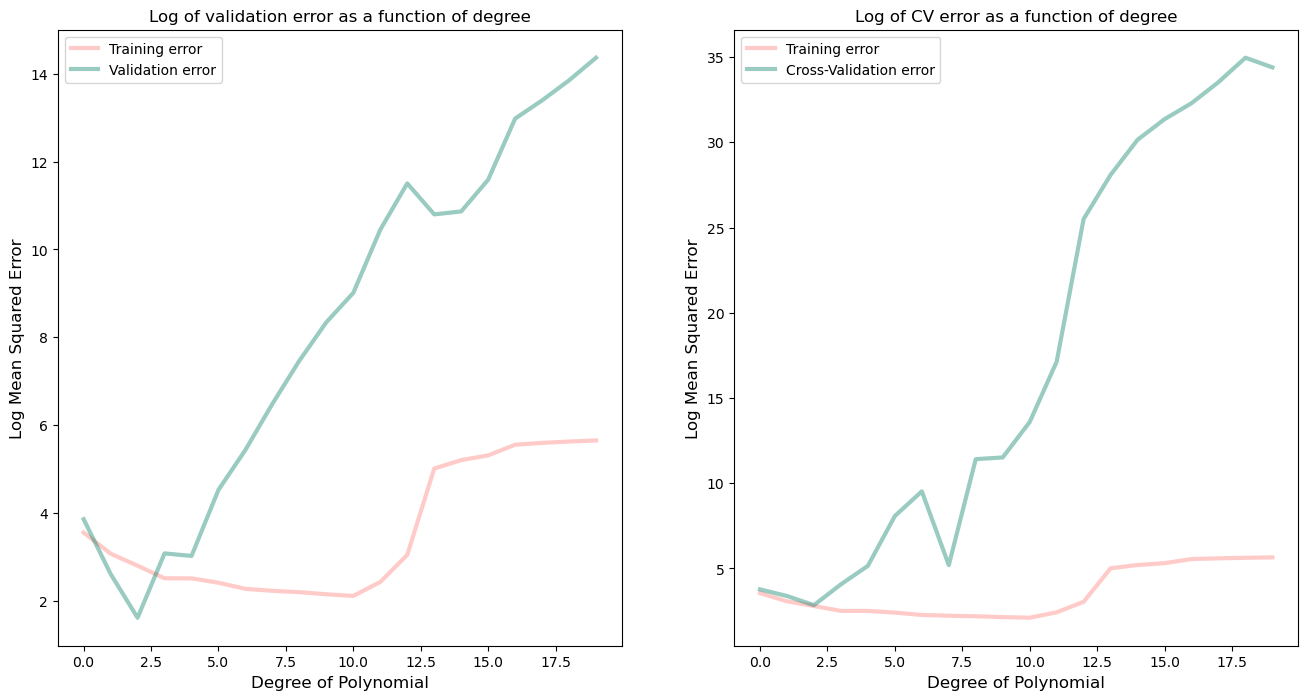

In [165]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();
